In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
ch=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
ch.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
ch.shape

(7043, 21)

In [5]:
len(ch.customerID.unique())

7043

In [24]:
ch["TotalCharges"][ch["TotalCharges"].isin([" "])]=np.nan
ch["TotalCharges"][ch["TotalCharges"].isnull()]=1397.475
ch["TotalCharges"]=ch["TotalCharges"].astype("float64")

C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Male      3555
Female    3488
Name: gender, dtype: int64


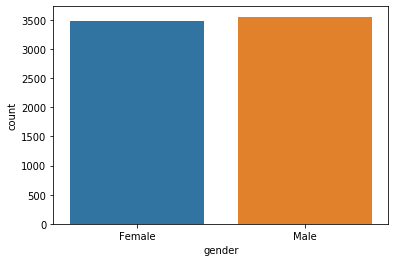

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


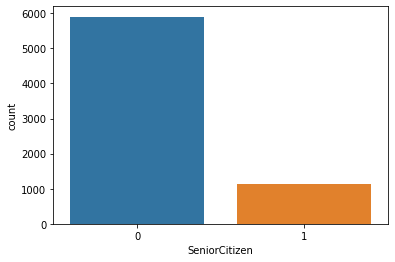

No     3641
Yes    3402
Name: Partner, dtype: int64


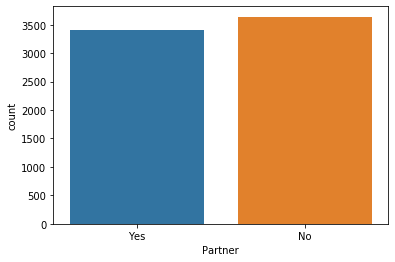

No     4933
Yes    2110
Name: Dependents, dtype: int64


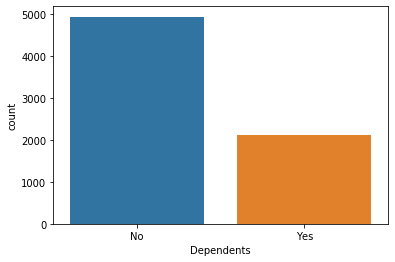

Yes    6361
No      682
Name: PhoneService, dtype: int64


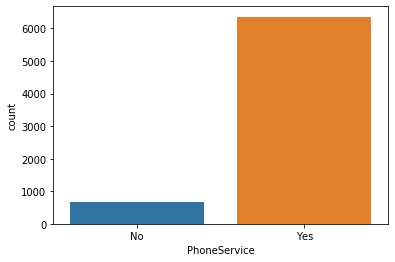

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


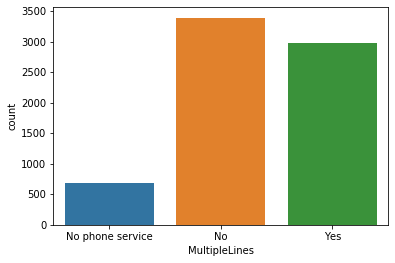

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


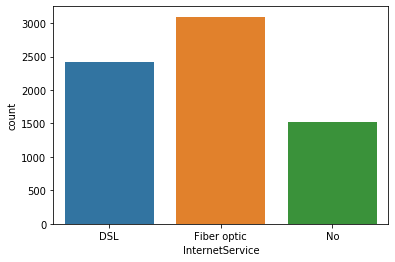

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


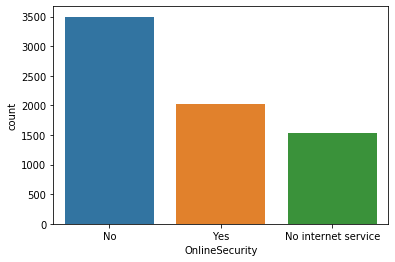

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


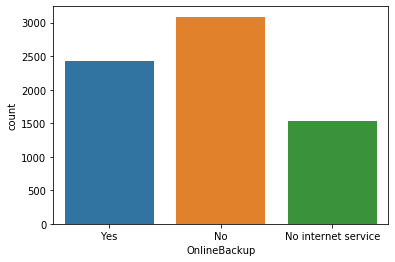

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


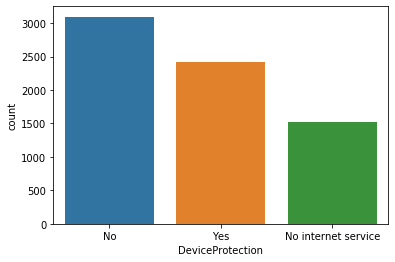

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


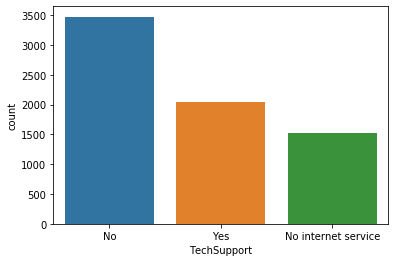

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


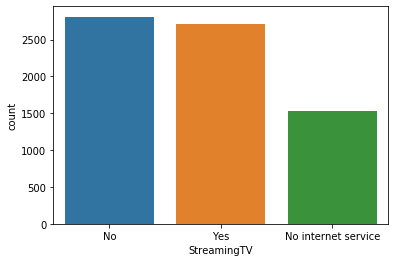

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


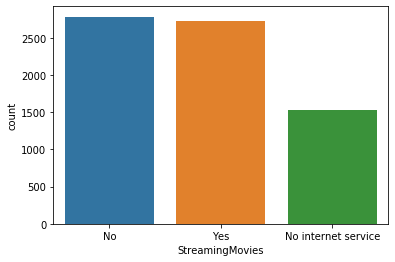

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


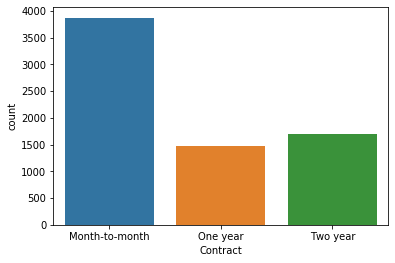

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


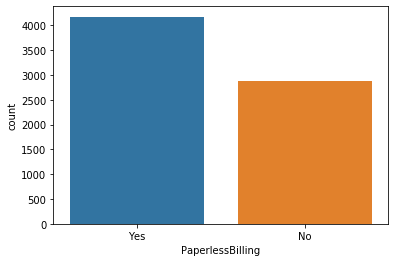

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


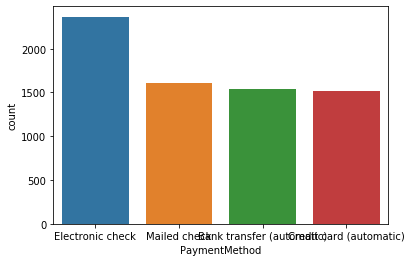

No     5174
Yes    1869
Name: Churn, dtype: int64


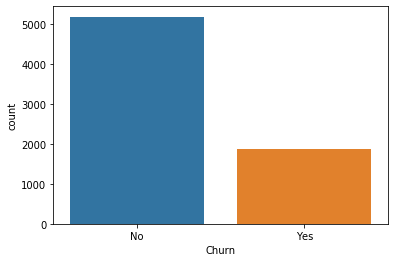

In [6]:
for i in ch.columns:
    if(len(ch[i].unique())<10):
        print(ch[i].value_counts())
        sns.countplot(ch[i])
        plt.show()

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


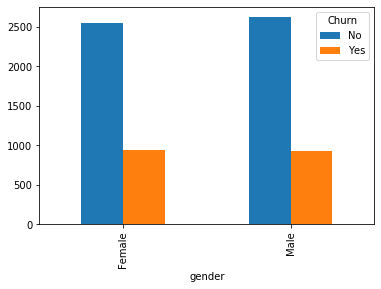

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


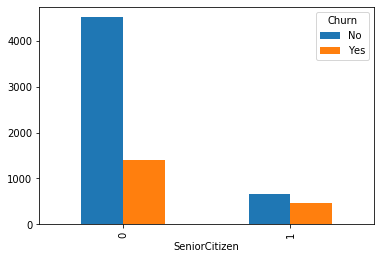

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


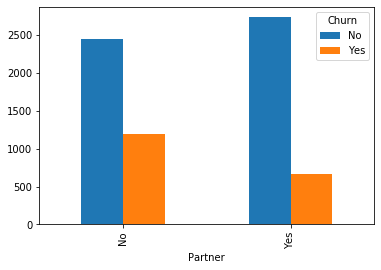

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


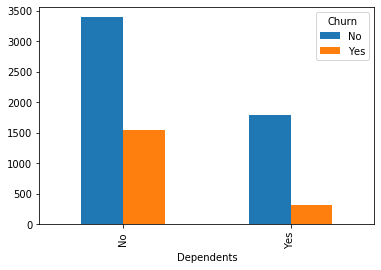

Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699


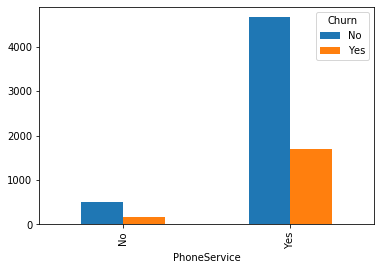

Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


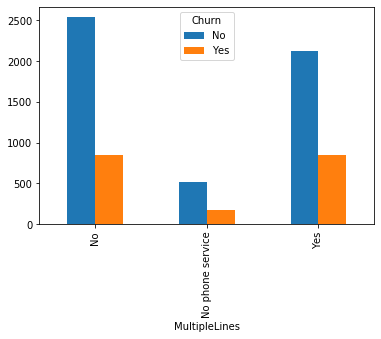

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


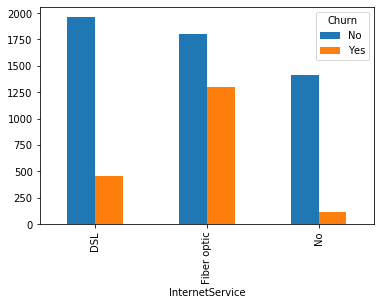

Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


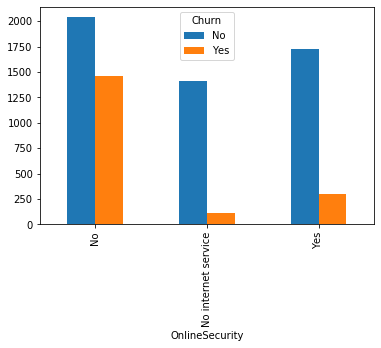

Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


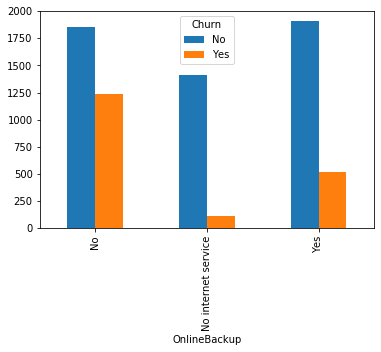

Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


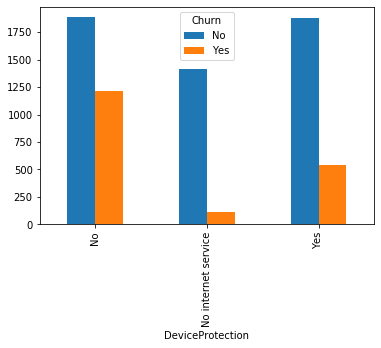

Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


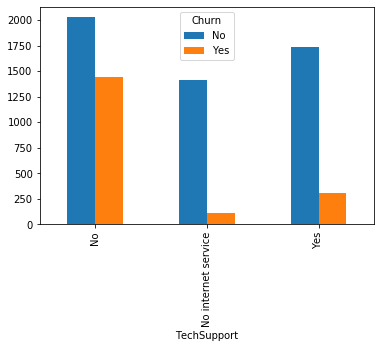

Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814


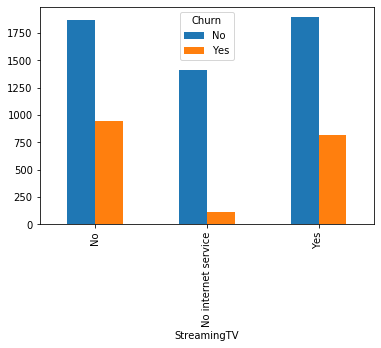

Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818


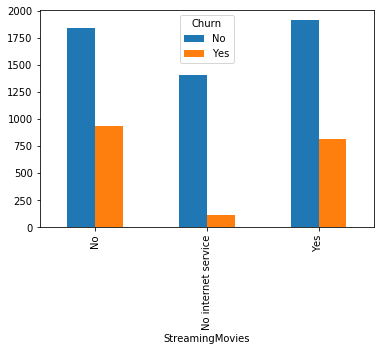

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


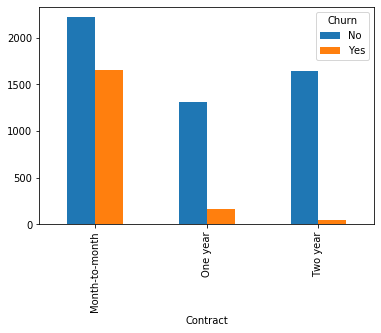

Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400


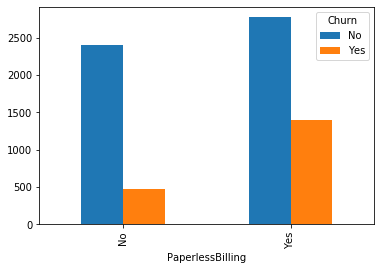

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


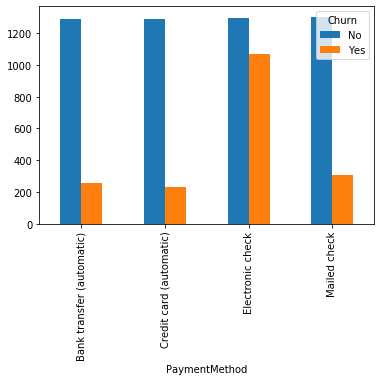

Churn    No   Yes
Churn            
No     5174     0
Yes       0  1869


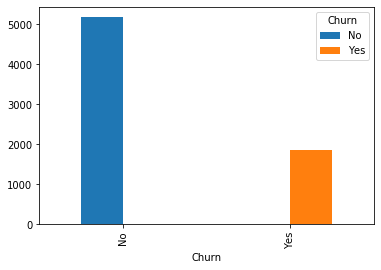

In [7]:
for i in ch.columns:
    if(len(ch[i].unique())<10):
        print(pd.crosstab(ch[i],ch["Churn"]))
        pd.crosstab(ch[i],ch["Churn"]).plot(kind="bar")
        plt.show()

In [8]:
senior=ch.groupby("SeniorCitizen")

Churn    No  Yes
gender          
Female  328  240
Male    338  236


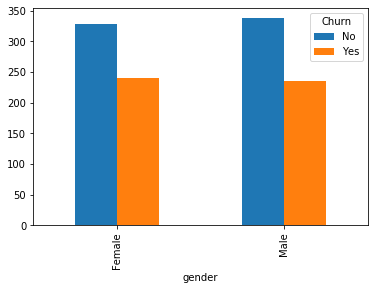

Churn           No  Yes
SeniorCitizen          
1              666  476


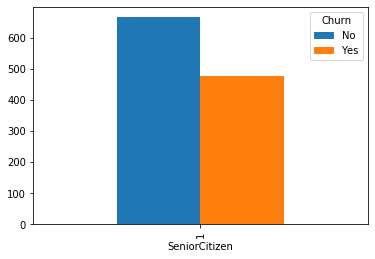

Churn     No  Yes
Partner          
No       291  278
Yes      375  198


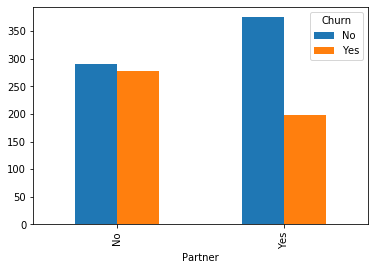

Churn        No  Yes
Dependents          
No          597  454
Yes          69   22


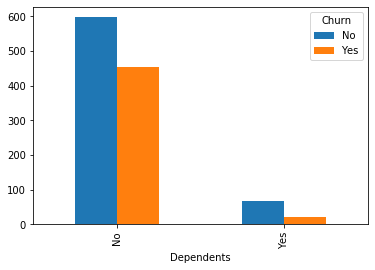

Churn          No  Yes
PhoneService          
No             60   44
Yes           606  432


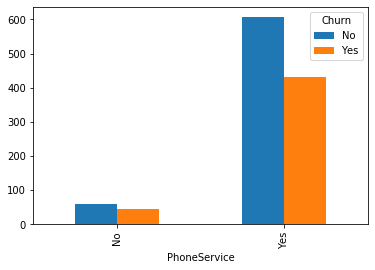

Churn              No  Yes
MultipleLines             
No                221  152
No phone service   60   44
Yes               385  280


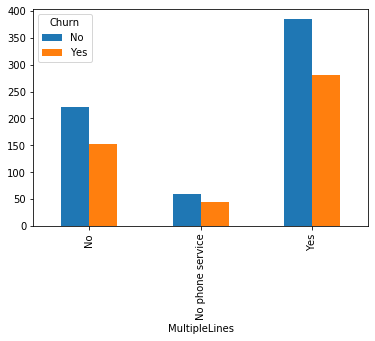

Churn             No  Yes
InternetService          
DSL              181   78
Fiber optic      438  393
No                47    5


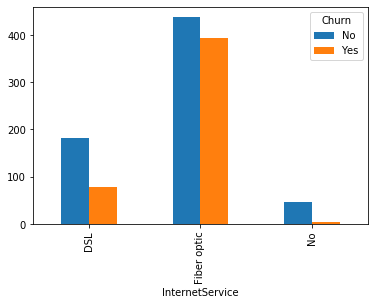

Churn                 No  Yes
OnlineSecurity               
No                   401  407
No internet service   47    5
Yes                  218   64


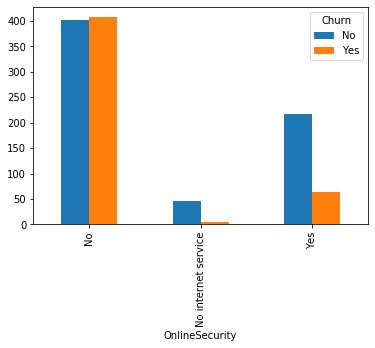

Churn                 No  Yes
OnlineBackup                 
No                   290  324
No internet service   47    5
Yes                  329  147


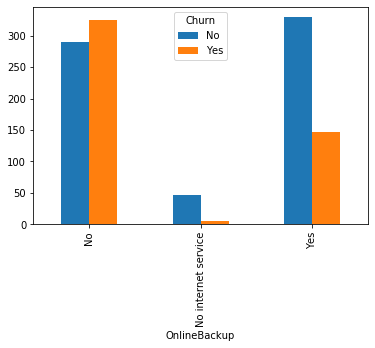

Churn                 No  Yes
DeviceProtection             
No                   304  320
No internet service   47    5
Yes                  315  151


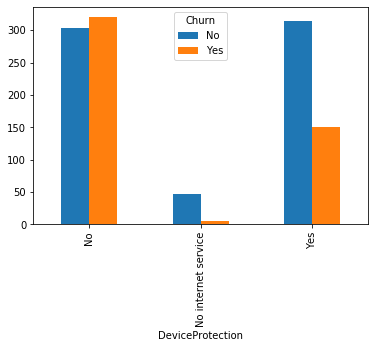

Churn                 No  Yes
TechSupport                  
No                   410  420
No internet service   47    5
Yes                  209   51


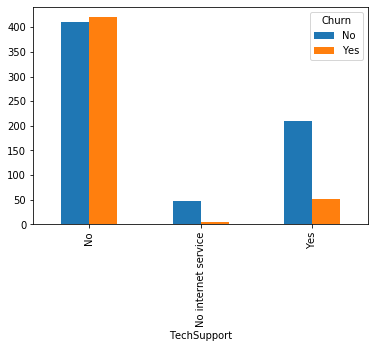

Churn                 No  Yes
StreamingTV                  
No                   276  242
No internet service   47    5
Yes                  343  229


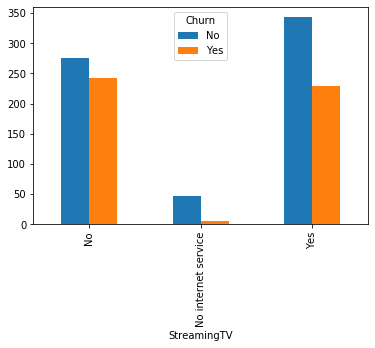

Churn                 No  Yes
StreamingMovies              
No                   268  227
No internet service   47    5
Yes                  351  244


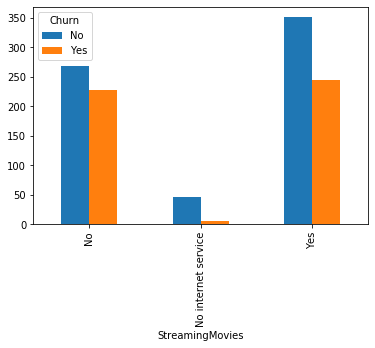

Churn            No  Yes
Contract                
Month-to-month  366  441
One year        161   29
Two year        139    6


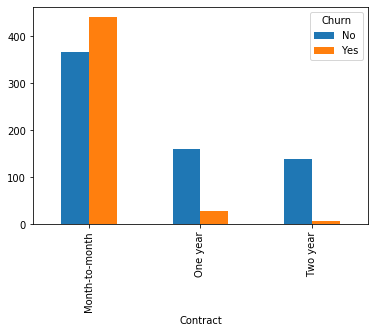

Churn              No  Yes
PaperlessBilling          
No                188   78
Yes               478  398


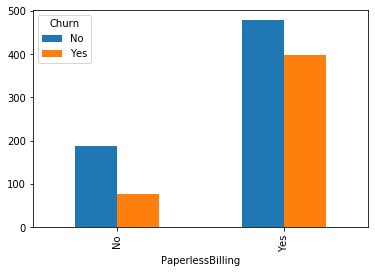

Churn                       No  Yes
PaymentMethod                      
Bank transfer (automatic)  180   53
Credit card (automatic)    159   62
Electronic check           277  317
Mailed check                50   44


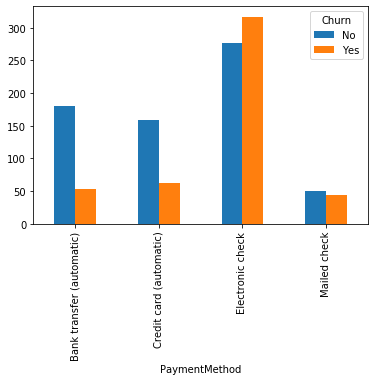

Churn   No  Yes
Churn          
No     666    0
Yes      0  476


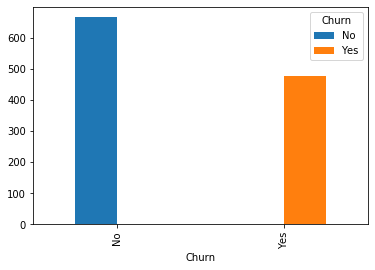

In [9]:
for i in senior.get_group(1).columns:
    if(len(senior[i].get_group(1).unique())<10):
        print(pd.crosstab(senior[i].get_group(1),senior["Churn"].get_group(1)))
        pd.crosstab(senior[i].get_group(1),senior["Churn"].get_group(1)).plot(kind="bar")
        plt.show()

Churn     No  Yes
gender           
Female  2221  699
Male    2287  694


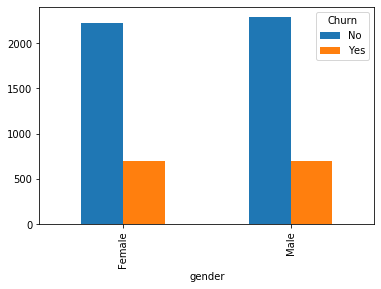

Churn            No   Yes
SeniorCitizen            
0              4508  1393


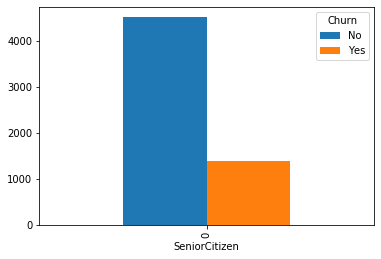

Churn      No  Yes
Partner           
No       2150  922
Yes      2358  471


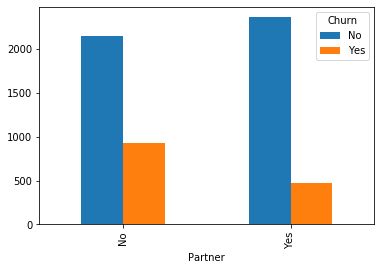

Churn         No   Yes
Dependents            
No          2793  1089
Yes         1715   304


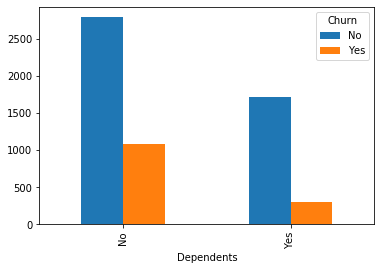

Churn           No   Yes
PhoneService            
No             452   126
Yes           4056  1267


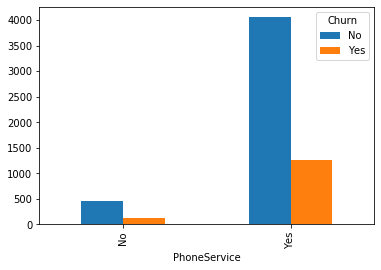

Churn               No  Yes
MultipleLines              
No                2320  697
No phone service   452  126
Yes               1736  570


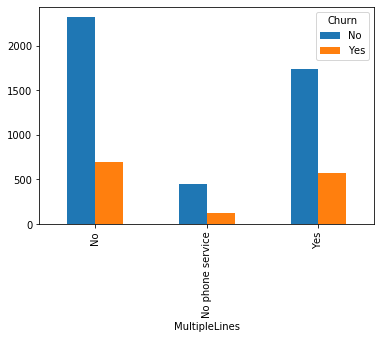

Churn              No  Yes
InternetService           
DSL              1781  381
Fiber optic      1361  904
No               1366  108


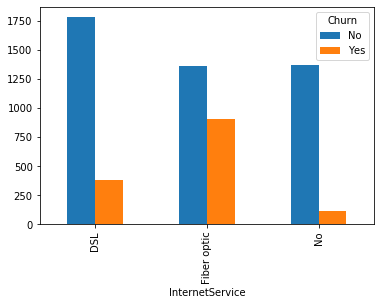

Churn                  No   Yes
OnlineSecurity                 
No                   1636  1054
No internet service  1366   108
Yes                  1506   231


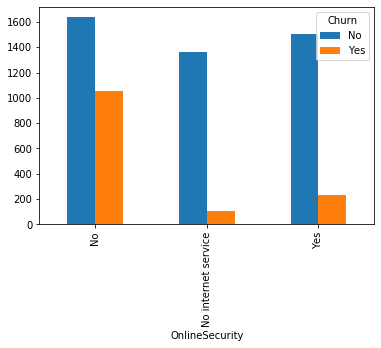

Churn                  No  Yes
OnlineBackup                  
No                   1565  909
No internet service  1366  108
Yes                  1577  376


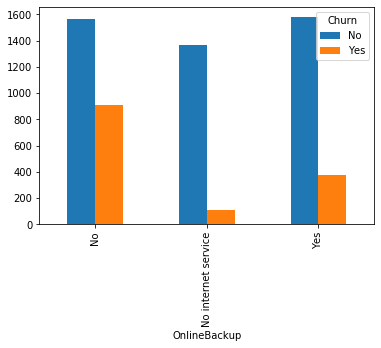

Churn                  No  Yes
DeviceProtection              
No                   1580  891
No internet service  1366  108
Yes                  1562  394


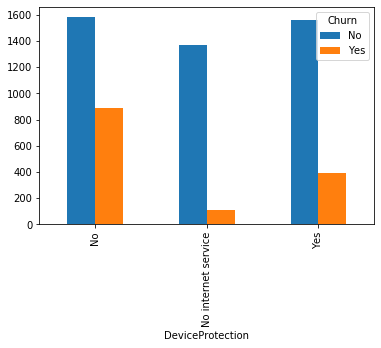

Churn                  No   Yes
TechSupport                    
No                   1617  1026
No internet service  1366   108
Yes                  1525   259


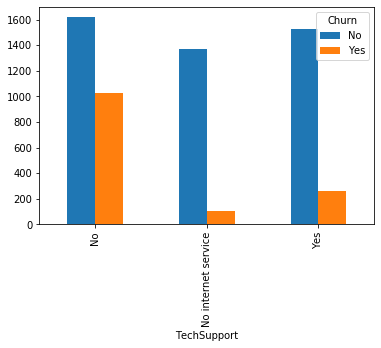

Churn                  No  Yes
StreamingTV                   
No                   1592  700
No internet service  1366  108
Yes                  1550  585


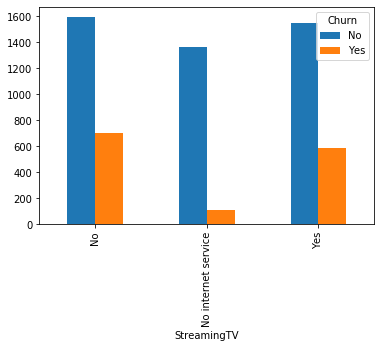

Churn                  No  Yes
StreamingMovies               
No                   1579  711
No internet service  1366  108
Yes                  1563  574


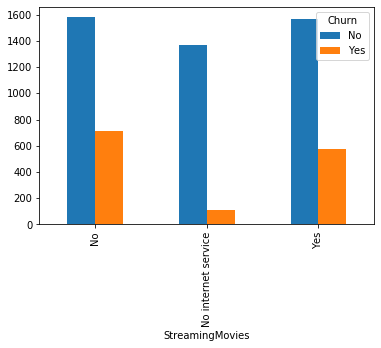

Churn             No   Yes
Contract                  
Month-to-month  1854  1214
One year        1146   137
Two year        1508    42


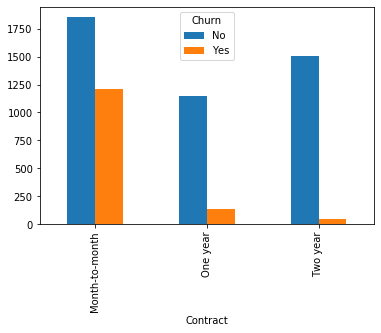

Churn               No   Yes
PaperlessBilling            
No                2215   391
Yes               2293  1002


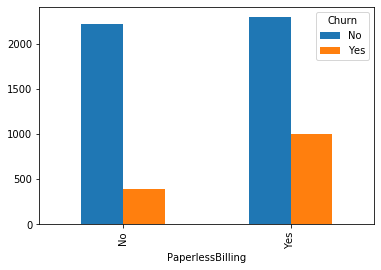

Churn                        No  Yes
PaymentMethod                       
Bank transfer (automatic)  1106  205
Credit card (automatic)    1131  170
Electronic check           1017  754
Mailed check               1254  264


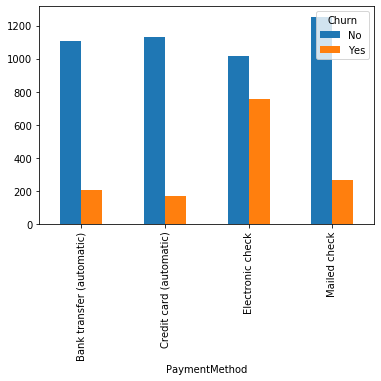

Churn    No   Yes
Churn            
No     4508     0
Yes       0  1393


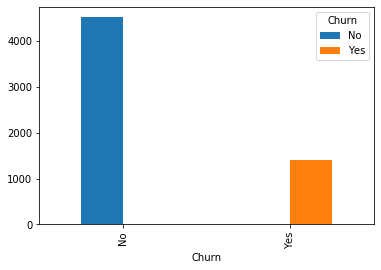

In [10]:
for i in senior.get_group(0).columns:
    if(len(senior[i].get_group(0).unique())<10):
        print(pd.crosstab(senior[i].get_group(0),senior["Churn"].get_group(0)))
        pd.crosstab(senior[i].get_group(0),senior["Churn"].get_group(0)).plot(kind="bar")
        plt.show()

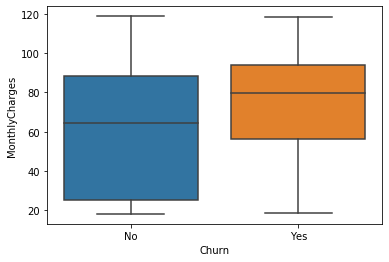

In [15]:
sns.boxplot(ch["Churn"],ch["MonthlyCharges"])

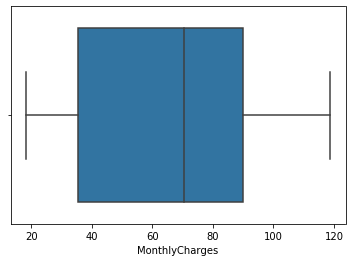

In [12]:
sns.boxplot(ch["MonthlyCharges"])

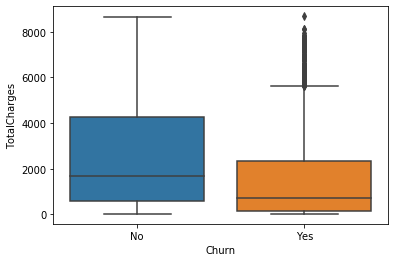

In [49]:
sns.boxplot(ch["Churn"],ch["TotalCharges"])

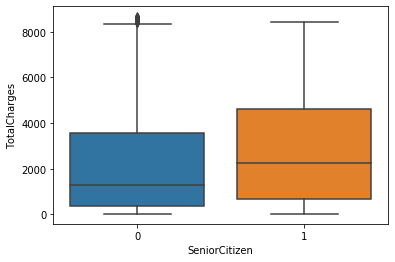

In [50]:
sns.boxplot(ch["SeniorCitizen"],ch["TotalCharges"])

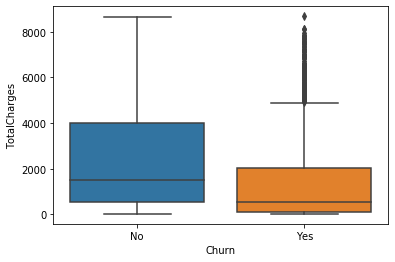

In [51]:
sns.boxplot(senior["Churn"].get_group(0),senior["TotalCharges"].get_group(0))

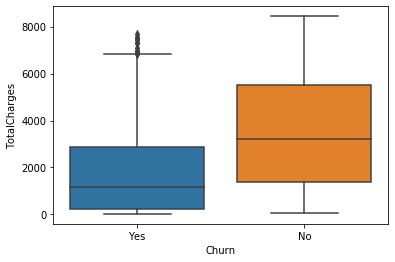

In [52]:
sns.boxplot(senior["Churn"].get_group(1),senior["TotalCharges"].get_group(1))

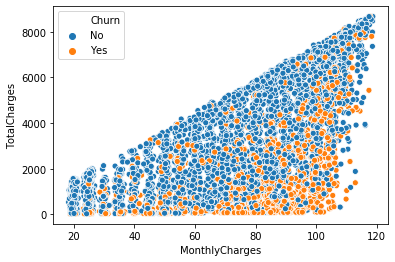

In [56]:
sns.scatterplot(ch["MonthlyCharges"],ch["TotalCharges"],hue=ch["Churn"])

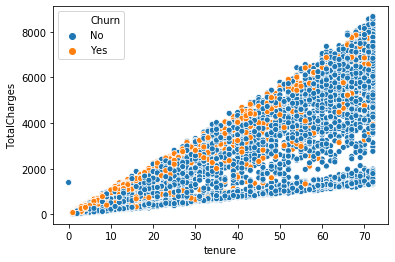

In [58]:
sns.scatterplot(ch["tenure"],ch["TotalCharges"],hue=ch["Churn"])

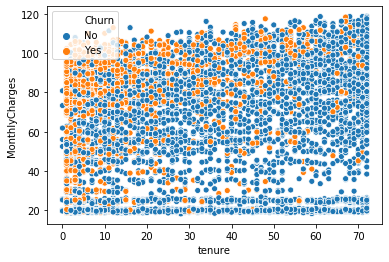

In [59]:
sns.scatterplot(ch["tenure"],ch["MonthlyCharges"],hue=ch["Churn"])

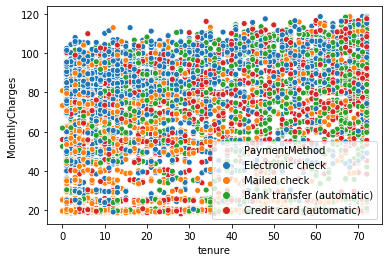

In [60]:
sns.scatterplot(ch["tenure"],ch["MonthlyCharges"],hue=ch["PaymentMethod"])

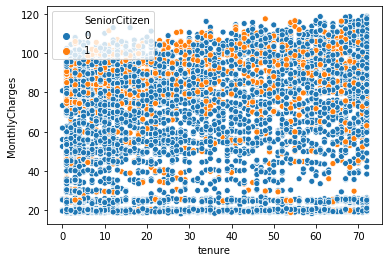

In [66]:
sns.scatterplot(ch["tenure"],ch["MonthlyCharges"],hue=ch["SeniorCitizen"])

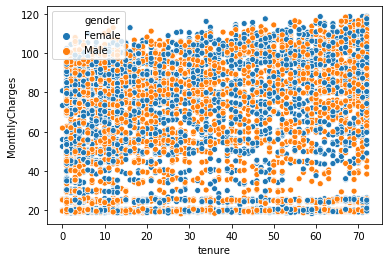

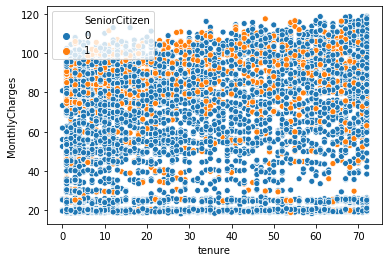

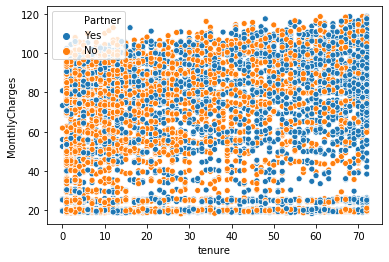

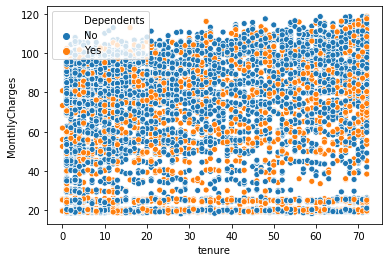

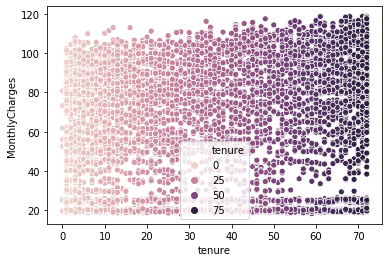

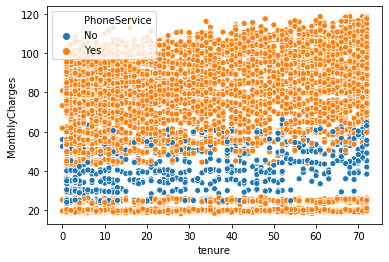

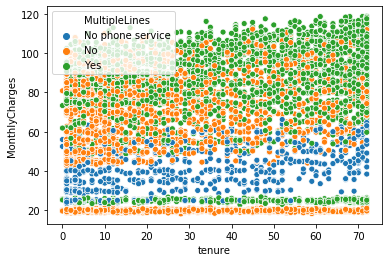

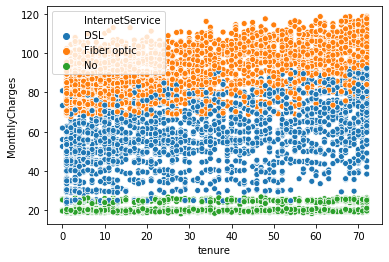

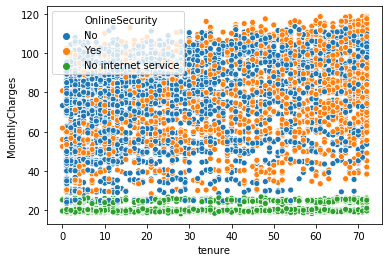

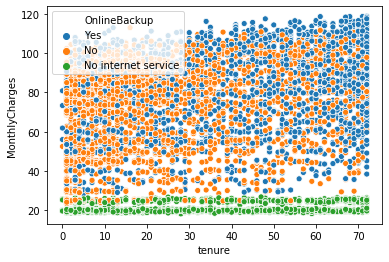

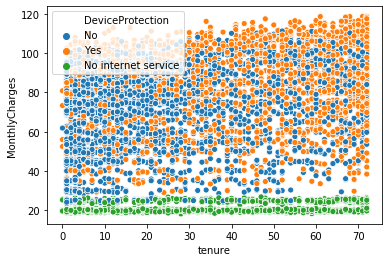

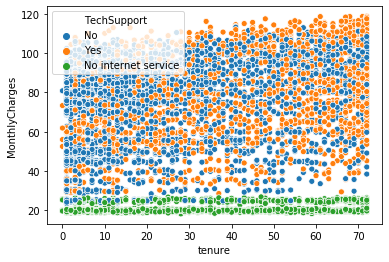

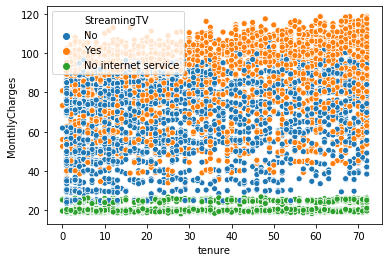

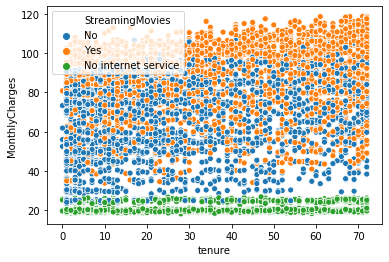

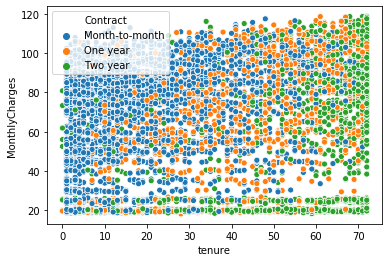

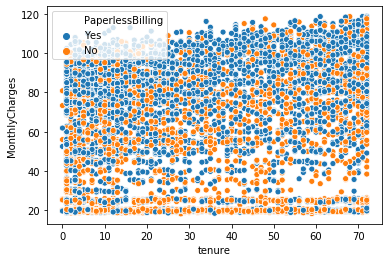

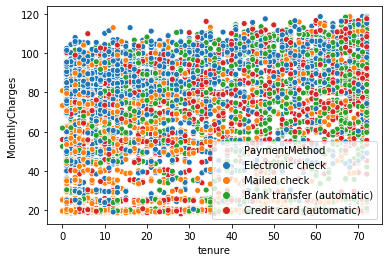

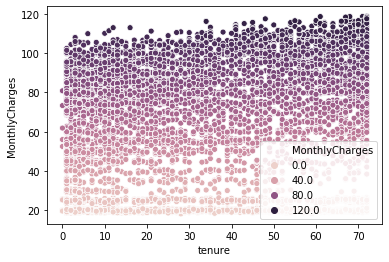

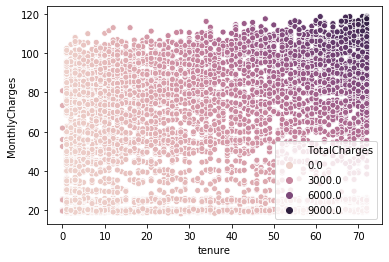

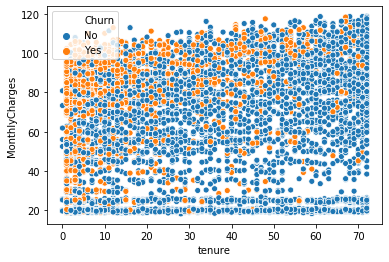

In [67]:
for i in ch.columns[1:]:
    if(i!="tenure" or i!="MonthlyCharges" or i!="TotalCharges" ):
        sns.scatterplot(ch["tenure"],ch["MonthlyCharges"],hue=ch[i])
        plt.show()

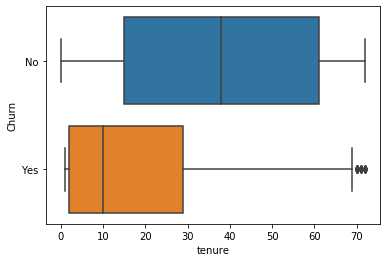

In [68]:
sns.boxplot(ch["tenure"],ch["Churn"])

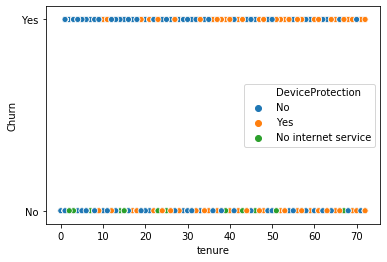

In [77]:
sns.scatterplot(ch["tenure"],ch["Churn"],hue=ch["DeviceProtection"])

In [78]:
internet= ch.groupby("InternetService")

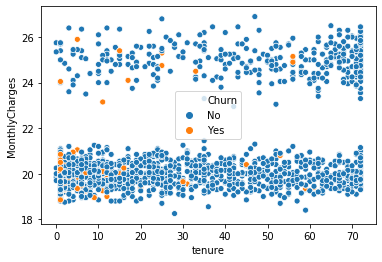

In [81]:
sns.scatterplot(internet["tenure"].get_group("No"),internet["MonthlyCharges"].get_group("No"),hue=ch["Churn"])

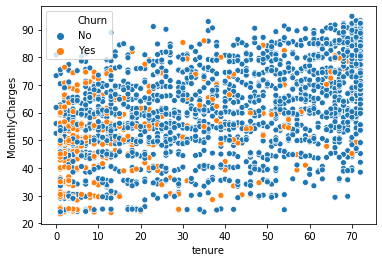

In [82]:
sns.scatterplot(internet["tenure"].get_group("DSL"),internet["MonthlyCharges"].get_group("DSL"),hue=ch["Churn"])

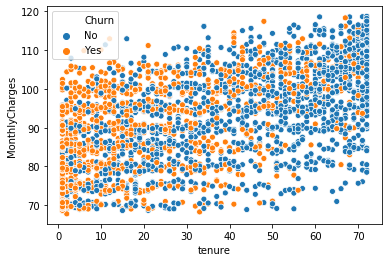

In [89]:
sns.scatterplot(internet["tenure"].get_group("Fiber optic"),internet["MonthlyCharges"].get_group("Fiber optic"),hue=ch["Churn"])

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder
le=MultiLabelBinarizer()

In [32]:
ch1=ch.copy()

In [33]:
ch1[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]]=ch[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]].apply(LabelEncoder().fit_transform)

In [34]:
ch1.corr()

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   
StreamingTV      -0.006421       0.030776  0.137341    0.046885  0.289373   
StreamingMovies  -0.008743       0.047266  0.129574    0.021321  0.296866   
Contract          0.000126      -0.142554  0.294806    0.243187  0.671607   
PaperlessBilling -0.011754       0.156530 -0.014877   -0.111377  0.006152   
PaymentMethod     0.017352      -0.038551 -0.154798   -0.040292 -0.370436   
MonthlyCharges   -0.014569       0.220173  0.096848   -0.113890  0.247900   
TotalCharges     -0.000002       0.102652  0.318364    0.063593  0.825464   
Churn            -0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  MultipleLines  InternetService  \
gender               -0.006488      -0.006739        -0.000863   
SeniorCitizen         0.008576       0.146185        -0.032310   
Partner               0.017706       0.142410         0.000891   
Dependents           -0.001762      -0.024991         0.044590   
tenure                0.008448       0.343032        -0.030359   
PhoneService          1.000000      -0.020538         0.387436   
MultipleLines        -0.020538       1.000000        -0.109216   
InternetService       0.387436      -0.109216         1.000000   
OnlineSecurity       -0.015198       0.007141        -0.028416   
OnlineBackup          0.024105       0.117327         0.036138   
DeviceProtection      0.003727       0.122318         0.044944   
TechSupport          -0.019158       0.011466        -0.026047   
StreamingTV           0.055353       0.175059         0.107417   
StreamingMovies       0.043870       0.180957         0.098350   
Contract              0.002247       0.110842         0.099721   
PaperlessBilling      0.016505       0.165146        -0.138625   
PaymentMethod        -0.004184      -0.176793         0.086140   
MonthlyCharges        0.247398       0.433576        -0.323260   
TotalCharges          0.113013       0.452849        -0.175588   
Churn                 0.011942       0.038037        -0.047291   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.015017     -0.012057          0.000549    -0.006825   
SeniorCitizen          -0.128221     -0.013632         -0.021398    -0.151268   
Partner                 0.150828      0.153130          0.166330     0.126733   
Dependents              0.152166      0.091015          0.080537     0.133524   
tenure                  0.325468      0.370876          0.371105     0.322942   
PhoneService           -0.015198      0.024105          0.003727    -0.019158   
MultipleLines           0.007141      0.117327          0.122318     0.011466   
InternetService        -0.028416      0.036138          0.044944    -0.026047   
OnlineSecurity          1.000000      0.185126          0.175985     0.285028   
OnlineBackup            0.185126      1.000000          0.187757     0.195748   
DeviceProtection        0.175985      0.187757          1.000000     0.240593   
TechSupport             0.285028      0.195

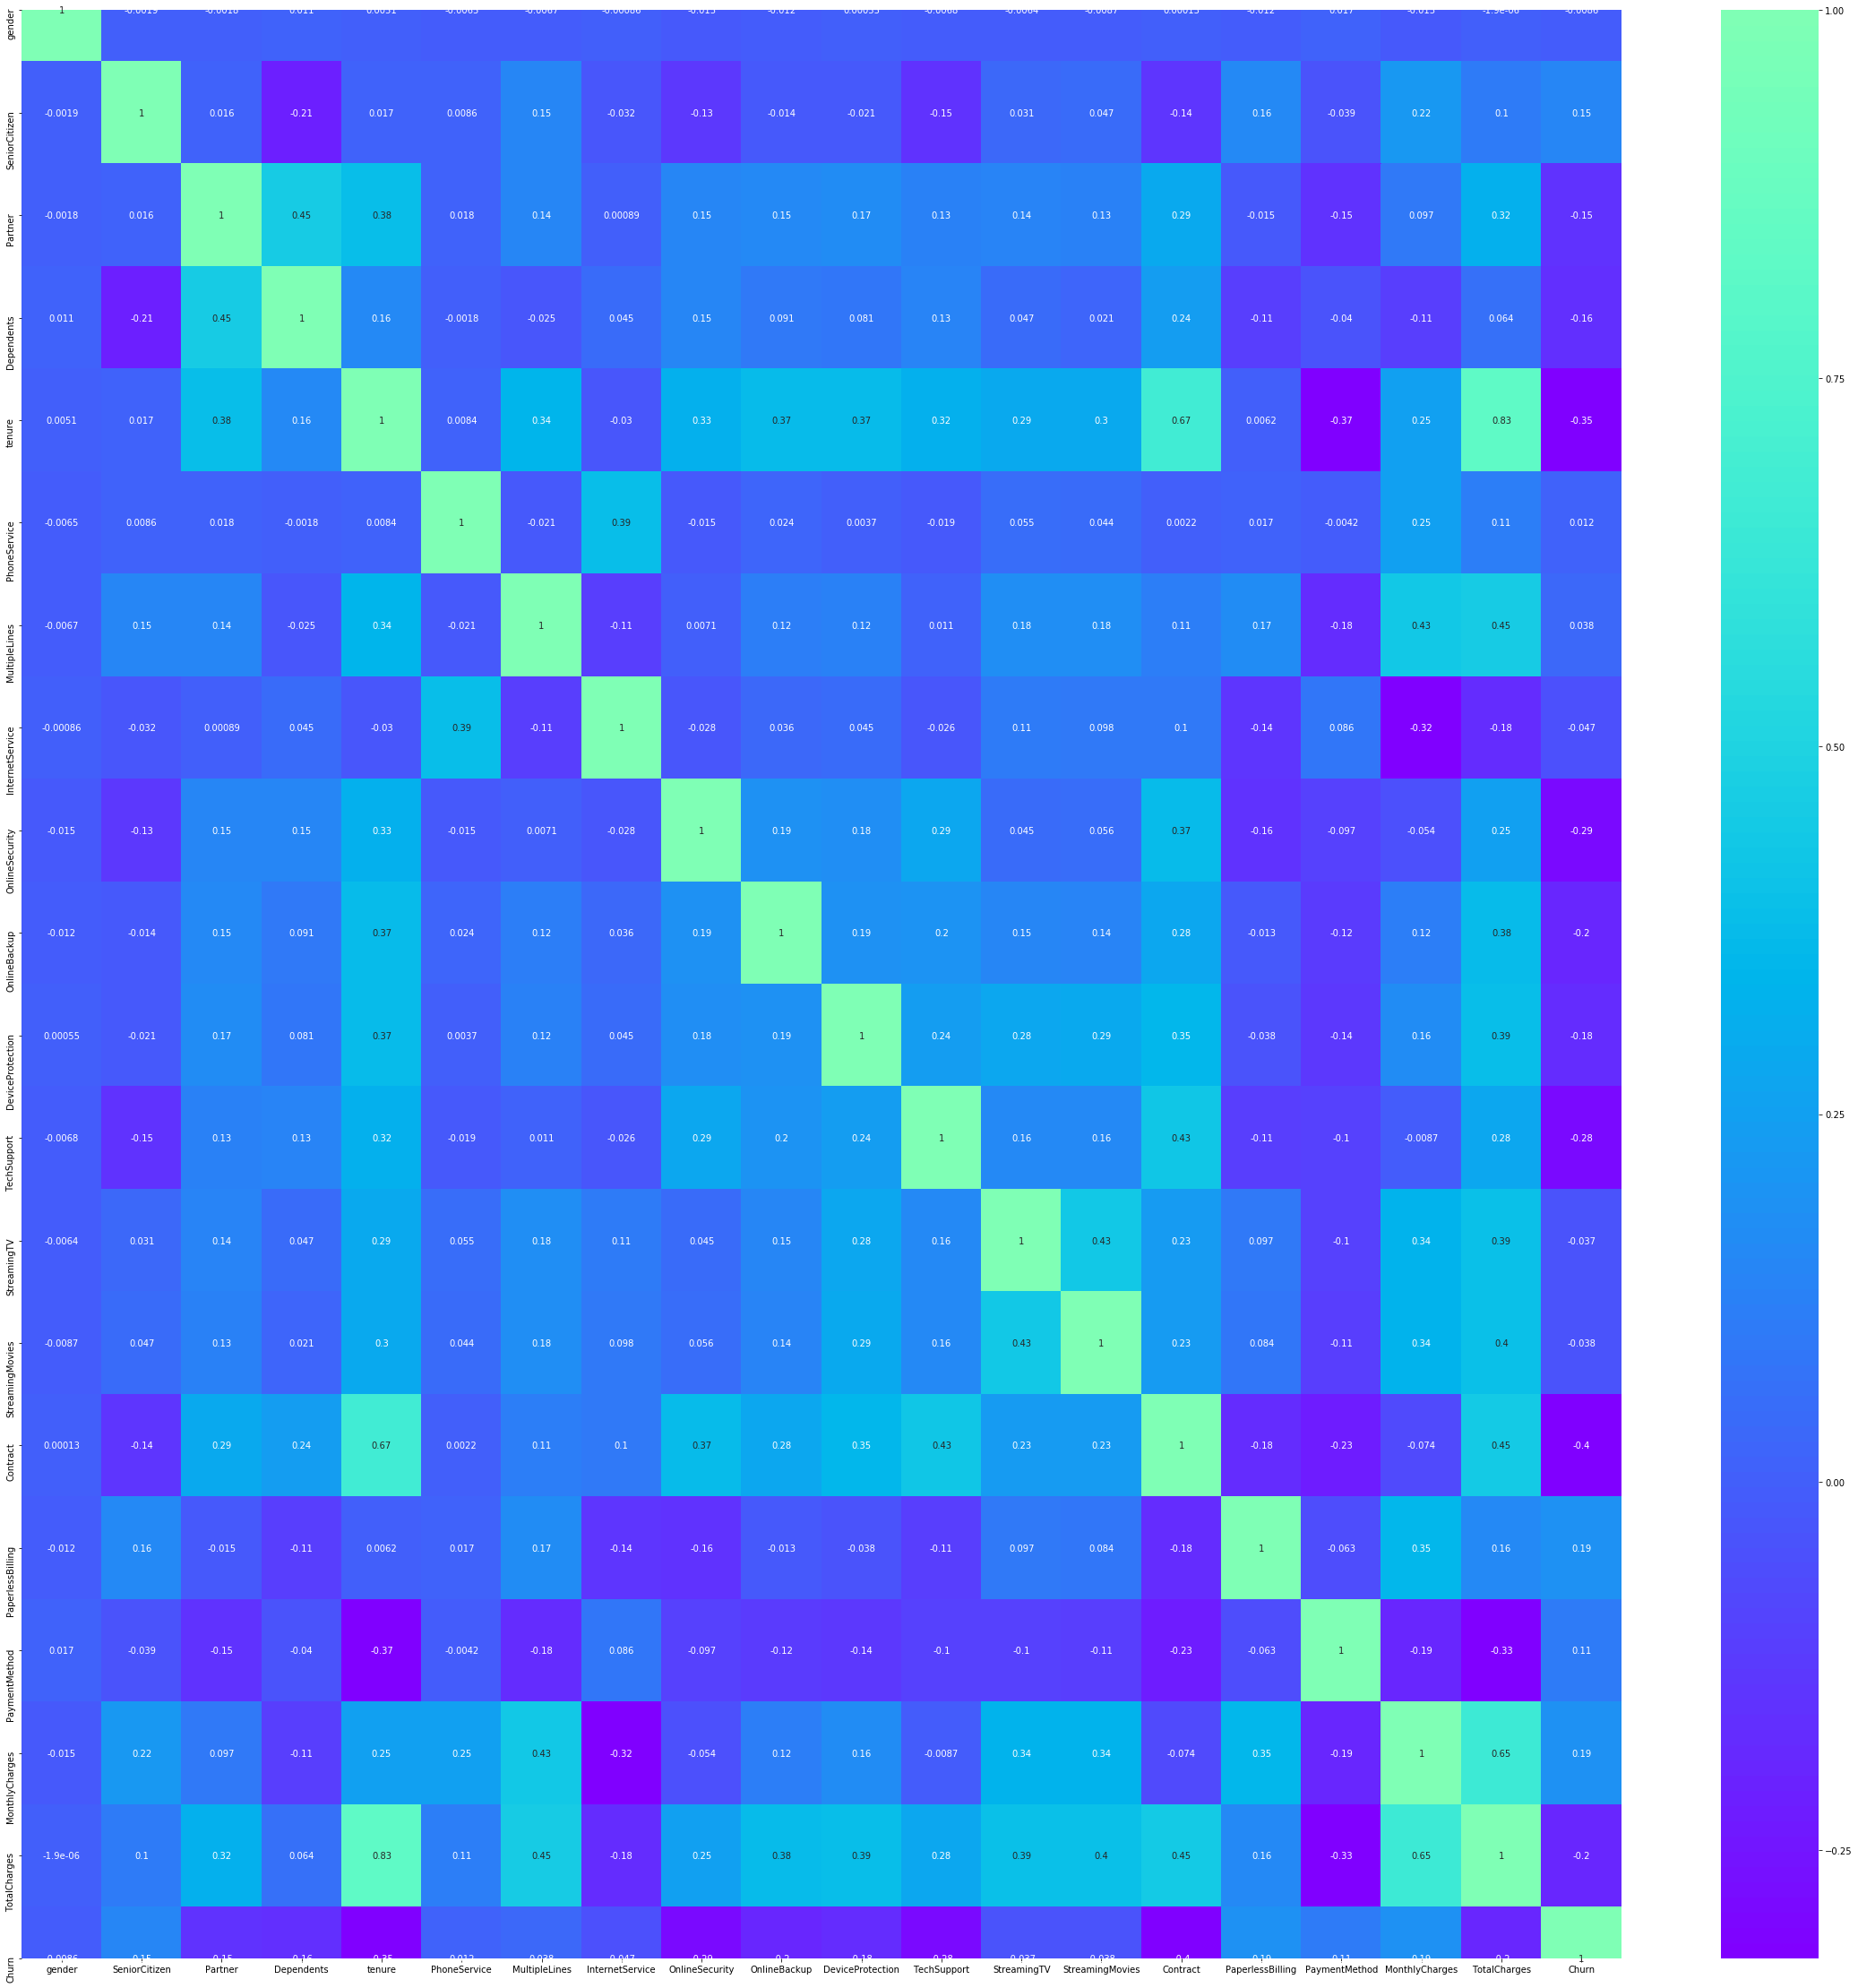

In [123]:
plt.figure(figsize=(40,40))
sns.heatmap(ch1.corr(method="pearson"),annot=True,cmap="rainbow",center=True,robust=True)
plt.show()

In [193]:
y=ch1["Churn"]

In [196]:
x=ch2.drop(["customerID0","Churn10"],axis=1)

In [197]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=101)

In [198]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(xtrain, ytrain)
from sklearn import metrics
prediction_test = model.predict(xtest)
print (metrics.accuracy_score(ytest, prediction_test))

0.8088026502602934


C:\Users\Barath\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [200]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
metrics.accuracy_score(ytest, preds)

ValueError: feature_names must be unique

In [140]:
ch2=ch.copy()

In [141]:
for i in ch2.columns:
    if(len(ch2[i].unique())==2):
        print(i)
        ch2[i]=ch2[[i]].apply(LabelEncoder().fit_transform)

gender
SeniorCitizen
Partner
Dependents
PhoneService
PaperlessBilling
Churn


In [142]:
u=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaymentMethod']
for i in u:
    dummy = pd.get_dummies(ch2[i],columns=ch2[i].unique())
    ch2=pd.concat([ch2,dummy],axis=1,sort=True)
    ch2.drop([i],axis=1,inplace=True)

In [187]:
from sklearn.svm import SVC

model = SVC() 
model.fit(xtrain,ytrain)
preds = model.predict(xtest)
metrics.accuracy_score(ytest, preds)

0.7316611452910554

In [189]:
z=0
for i in ch2.columns:
    ch2.rename(columns = {i:i+str(z)}, inplace = True)
    print(i+str(z))
    z=z+1

customerID0
gender1
SeniorCitizen2
Partner3
Dependents4
tenure5
PhoneService6
PaperlessBilling7
MonthlyCharges8
TotalCharges9
Churn10
No11
No phone service12
Yes13
DSL14
Fiber optic15
No16
No17
No internet service18
Yes19
No20
No internet service21
Yes22
No23
No internet service24
Yes25
No26
No internet service27
Yes28
No29
No internet service30
Yes31
No32
No internet service33
Yes34
Month-to-month35
One year36
Two year37
Bank transfer (automatic)38
Credit card (automatic)39
Electronic check40
Mailed check41


In [201]:
ch2.isnull().sum()

customerID0                    0
gender1                        0
SeniorCitizen2                 0
Partner3                       0
Dependents4                    0
tenure5                        0
PhoneService6                  0
PaperlessBilling7              0
MonthlyCharges8                0
TotalCharges9                  0
Churn10                        0
No11                           0
No phone service12             0
Yes13                          0
DSL14                          0
Fiber optic15                  0
No11                           0
No11                           0
No internet service18          0
Yes13                          0
No11                           0
No internet service18          0
Yes13                          0
No11                           0
No internet service18          0
Yes13                          0
No11                           0
No internet service18          0
Yes13                          0
No11                           0
No interne

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix